# Практика

In [1]:
!pip install psycopg2

In [2]:
import psycopg2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


# доступны student-ы от 0 до 9
# в этот раз важно взять своего student-а. Если в коде ниже увидите, что в вашей базе уже есть таблицы, то выберите другого пользователя.
# НЕ ЗАБУДЬТЕ ВЫПОЛНИТЬ КОД ЭТОЙ КЛЕТКИ



DB_HOST = '89.223.95.138'
DB_USER = 'student_8'
DB_USER_PASSWORD = 'student_8'
DB_NAME = 'student_8'

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [14]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,book_collection,student_8,None,True,False,True,False
1,public,adv_glossary_ver,student_8,None,True,False,True,False
2,public,employee,student_8,None,True,False,True,False
3,public,loss,student_8,None,True,False,True,False
4,public,storage_location,student_8,None,True,False,True,False
5,public,readers,student_8,None,True,False,True,False
6,public,results,student_8,None,True,False,True,False
7,public,adv_glossary,student_8,None,True,False,True,False
8,public,adv_events,student_8,None,True,False,True,False


### Шаг 1
Сгенерируем данные по показам, кликам, и деньгам по 5 объявлениям с названиями Advertising_0, Advertising_1, ...

Просто выполните две клетки ниже

In [5]:
adv_sample = 'Advertising_{}'
advertisings = []
for i in range(5):
  advertisings.append(adv_sample.format(i))
advertisings

['Advertising_0',
 'Advertising_1',
 'Advertising_2',
 'Advertising_3',
 'Advertising_4']

In [6]:
from datetime import datetime, timedelta, date
DATE_FORMAT = '%Y-%m-%d'
start_date = date(2019, 8, 1)
data = {}
for adv_id in range(1, len(advertisings)+1):
  day_data = []
  data[adv_id] = []
  for idx, events_number in enumerate(np.random.random_integers(50, 100, 30)):
    events = np.zeros(events_number)
    events[np.random.rand(events_number) > 0.5] = 1
    money = np.round(events * np.random.rand(events_number)*10 + np.random.rand(events_number), 2)
    dt = start_date + timedelta(days=idx)
    dates = [dt.strftime(DATE_FORMAT) for j in range(events_number)]
    day_data = list(zip(dates, events, money))
    data[adv_id] += day_data
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(50, 100 + 1) instead
  


{1: [('2019-08-01', 1.0, 3.48),
  ('2019-08-01', 1.0, 6.79),
  ('2019-08-01', 0.0, 0.4),
  ('2019-08-01', 1.0, 4.2),
  ('2019-08-01', 1.0, 10.25),
  ('2019-08-01', 1.0, 9.12),
  ('2019-08-01', 1.0, 8.15),
  ('2019-08-01', 0.0, 0.64),
  ('2019-08-01', 1.0, 0.91),
  ('2019-08-01', 0.0, 0.75),
  ('2019-08-01', 1.0, 3.47),
  ('2019-08-01', 1.0, 7.65),
  ('2019-08-01', 0.0, 0.1),
  ('2019-08-01', 0.0, 0.61),
  ('2019-08-01', 0.0, 0.12),
  ('2019-08-01', 0.0, 0.22),
  ('2019-08-01', 1.0, 4.81),
  ('2019-08-01', 0.0, 0.1),
  ('2019-08-01', 1.0, 3.71),
  ('2019-08-01', 0.0, 0.82),
  ('2019-08-01', 1.0, 5.59),
  ('2019-08-01', 0.0, 0.23),
  ('2019-08-01', 0.0, 0.68),
  ('2019-08-01', 1.0, 5.83),
  ('2019-08-01', 0.0, 0.08),
  ('2019-08-01', 0.0, 0.38),
  ('2019-08-01', 1.0, 5.57),
  ('2019-08-01', 0.0, 0.65),
  ('2019-08-01', 0.0, 0.3),
  ('2019-08-01', 1.0, 4.53),
  ('2019-08-01', 1.0, 5.81),
  ('2019-08-01', 1.0, 2.8),
  ('2019-08-01', 0.0, 0.84),
  ('2019-08-01', 0.0, 0.15),
  ('2019-08-01',

In [7]:
data.keys()

dict_keys([1, 2, 3, 4, 5])

Теперь в массиве advertisings у нас лежат названия объявлений, а в словаре data ключом является идентификатор объявления в нашей будущей базе данных (при использовании SERIAL идентификаторы будут от 1 до 5 соответственно). 

Значениями в словаре data являются массивы tuple-ов в которых по порядку записана дата события, тип события, а также кол-во денег, которое стоило это событие. 

*   0 это показ
*   1 это клик (если был клик, то был и показ)
*   кол-во денег указано в рублях



In [8]:
data[1][0][2]

3.48

In [9]:
advertisings

['Advertising_0',
 'Advertising_1',
 'Advertising_2',
 'Advertising_3',
 'Advertising_4']

### Шаг 2
Создадим структуру таблиц.
Нам понадобится создать две таблицы. В одной будут храниться названия объявлений с их уникальным идентификатором, а во второй будут храниться события, относящиеся к этим объявлениям. При этом вторая таблица связана с первой таблицей первичным ключом.

In [10]:
# выполните, чтобы получить объект соединения
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME) # создаём соединение

In [ ]:
# выполните эту клетку если захотите удалить ошибочно созданную таблицу adv_glossary
query = "DROP TABLE IF EXISTS adv_glossary"

conn.cursor().execute(query) # выполняем запрос
conn.commit() # сохраняем изменения

InternalError: ignored

In [13]:
# выполните эту клетку если захотите удалить ошибочно созданную таблицу adv_events
query = "DROP TABLE IF EXISTS adv_events_ver"


conn.cursor().execute(query) # выполняем запрос
conn.commit() # сохраняем изменения

In [ ]:
# напишите запрос для создания таблицы с объявлениями
query = """
CREATE TABLE IF NOT EXISTS adv_glossary_ver (
    id SERIAL PRIMARY KEY,
    name VARCHAR(50))
"""
conn.cursor().execute(query)
conn.commit()

In [11]:
pd.read_sql_query("SELECT * FROM adv_glossary_ver", conn)

,id,name
0,1,Advertising_0
1,2,Advertising_1
2,3,Advertising_2
3,4,Advertising_3
4,5,Advertising_4


In [ ]:
conn.rollback()

In [15]:
# напишите запрос для создания таблицы с событиями по объявлениям
query = """
CREATE TABLE IF NOT EXISTS adv_events_ver (
    id SERIAL PRIMARY KEY,
    adv_id INT,
    date DATE, 
    event_type smallint,
    money numeric(7,2))
"""
conn.cursor().execute(query)
conn.commit()

In [16]:
pd.read_sql_query("SELECT * FROM adv_events_ver", conn)

,id,adv_id,date,event_type,money


In [17]:
# а также добавьте ограничение целостности на идентификатор объявления
query = """
ALTER TABLE adv_events_ver ADD FOREIGN KEY (adv_id) REFERENCES adv_glossary_ver(id)  

"""
conn.cursor().execute(query)
conn.commit()


### Шаг 3
Теперь, когда таблицы созданы, наполните их данными. Это может занять некоторое время, подождите, выпейте чаю;). Заметьте, если внешний ключ создан правильно, то база не даст вписать данные с несуществующими связями. 
С какой базы надо начать наполнение?

In [ ]:
# ваш код тут
for i in range(5):
     queries = "INSERT INTO adv_glossary_ver (name) VALUES (""'""" + advertisings[i] +"""'"""")"     
     conn.cursor().execute(queries)
conn.commit()

In [ ]:
conn.rollback()

In [18]:
for i in range(5):
    for j in data[i+1]:
        
        a=str(list(data.keys())[i])+""",'"""+str(j[0])+"""',"""+str(j[1])+""","""+str(j[2])
        q="INSERT INTO adv_events_ver (adv_id, date, event_type,  money) VALUES ("+a+")"
        conn.cursor().execute(q)

conn.commit()

### Шаг 4
Проверьте, что данные действительно появились в таблицах

In [ ]:
pd.read_sql_query("SELECT * FROM adv_glossary_ver", conn)

,id,name
0,1,Advertising_0
1,2,Advertising_1
2,3,Advertising_2
3,4,Advertising_3
4,5,Advertising_4


In [19]:
pd.read_sql_query("SELECT * FROM adv_events_ver", conn)

,id,adv_id,date,event_type,money
0,1,1,2019-08-01,1,3.48
1,2,1,2019-08-01,1,6.79
2,3,1,2019-08-01,0,0.40
3,4,1,2019-08-01,1,4.20
4,5,1,2019-08-01,1,10.25
...,...,...,...,...,...
11134,11135,5,2019-08-30,1,7.89
11135,11136,5,2019-08-30,1,9.97
11136,11137,5,2019-08-30,0,0.26
11137,11138,5,2019-08-30,1,3.89


In [ ]:
# ваш код тут

In [23]:
conn.rollback()

### Шаг 5
Теперь для каждого объявления посчитайте [CTR](https://ru.wikipedia.org/wiki/CTR_(%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82)#targetText=CTR%20(%D1%81%D0%B8%D0%BD%D0%BE%D0%BD%D0%B8%D0%BC%20%E2%80%94%20%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0%D0%B1%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C%2C%20%D0%BE%D1%82,%D1%87%D0%B8%D1%81%D0%BB%D1%83%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2%2C%20%D0%B8%D0%B7%D0%BC%D0%B5%D1%80%D1%8F%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2%20%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D0%BD%D1%82%D0%B0%D1%85.&targetText=%D0%9D%D0%B0%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%3A%20%D1%80%D0%B5%D0%BA%D0%BB%D0%B0%D0%BC%D0%BD%D1%8B%D0%B9%20%D0%B1%D0%BB%D0%BE%D0%BA%20%D0%B1%D1%8B%D0%BB%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD,%D0%BD%D0%B0%20%D0%BD%D0%B5%D0%B3%D0%BE%20%D0%BA%D0%BB%D0%B8%D0%BA%D0%BD%D1%83%D0%BB%D0%B8%202%20%D1%80%D0%B0%D0%B7%D0%B0.) и [CPM](http://promo-sa.ru/seo-terms/cpm) за каждый день с помощью sql запроса, и выведите результат в pandas.

В результирующем датафрейме должно быть отражено название объявления, дата, CTR за день, CPM за день.

In [ ]:
# data = pd.read_sql_query("", conn) # считаем данные в переменную
# Всё сводится к тому ,чтобы посчитать кол-во кликов и кол-во показов. 
pd.read_sql_query("", conn)

# CTR = количество кликов / количество показов * 100%
# CPM = стоимость размещения рекламы / количество просмотров * 1000 показов.

In [25]:
pd.read_sql_query("""
SELECT adv_id, date, sum(event_type), count(event_type), sum(money)
FROM adv_events_ver

GROUP BY date, adv_id

""", conn)
# посчитала суммы затрат, кол-во кликов и кол-во просмотров

,adv_id,date,sum,count,sum
0,2,2019-08-19,41,80,216.29
1,5,2019-08-03,50,100,336.65
2,5,2019-08-24,38,78,205.04
3,2,2019-08-15,29,59,207.39
4,1,2019-08-13,36,68,205.36
...,...,...,...,...,...
145,5,2019-08-23,56,95,320.53
146,3,2019-08-01,35,68,204.16
147,2,2019-08-08,38,79,238.47
148,5,2019-08-18,24,59,147.27


In [24]:
conn.rollback()

In [27]:
a=pd.read_sql_query("""
SELECT adv_id, name, date, (klik*100/disp) AS CTR,  (cash*1000/disp) AS CPM
FROM 
(SELECT adv_id, date, sum(event_type) AS klik, count(event_type) AS disp, sum(money) AS cash
FROM adv_events_ver
GROUP BY date, adv_id ) s
INNER JOIN adv_glossary_ver a 
ON a.id=s.adv_id
order by 3,2
""", conn)
a
#с помощью подзаспроса считаю на каждую дату ctr  и cpm 

,adv_id,name,date,ctr,cpm
0,1,Advertising_0,2019-08-01,49,2646.909091
1,2,Advertising_1,2019-08-01,51,2648.282828
2,3,Advertising_2,2019-08-01,51,3002.352941
3,4,Advertising_3,2019-08-01,49,3166.557377
4,5,Advertising_4,2019-08-01,56,3516.406250
...,...,...,...,...,...
145,1,Advertising_0,2019-08-30,44,2545.757576
146,2,Advertising_1,2019-08-30,51,3153.535354
147,3,Advertising_2,2019-08-30,46,2335.076923
148,4,Advertising_3,2019-08-30,45,2583.684211


### Шаг 6
Но на таблицу не так интересно смотреть как на графики...

Для каждого объявления постройте дневные графики CTR и CPM.

На всякий случай проследите, чтобы данные были нарисованы по возрастанию даты. Для этого надо либо отсортировать датафрейм по дате, либо проследить, что тип данных у это поля в pandas что-то типа date. Чтобы посмотреть типы полей в pandas используйте атрибут датафрейма .dtypes

In [29]:
a.dtypes

adv_id      int64
name       object
date       object
ctr         int64
cpm       float64
dtype: object

In [35]:
a['date']=pd.to_datetime(a['date'])

In [36]:
a.dtypes

adv_id             int64
name              object
date      datetime64[ns]
ctr                int64
cpm              float64
dtype: object

Text(0, 0.5, '%')

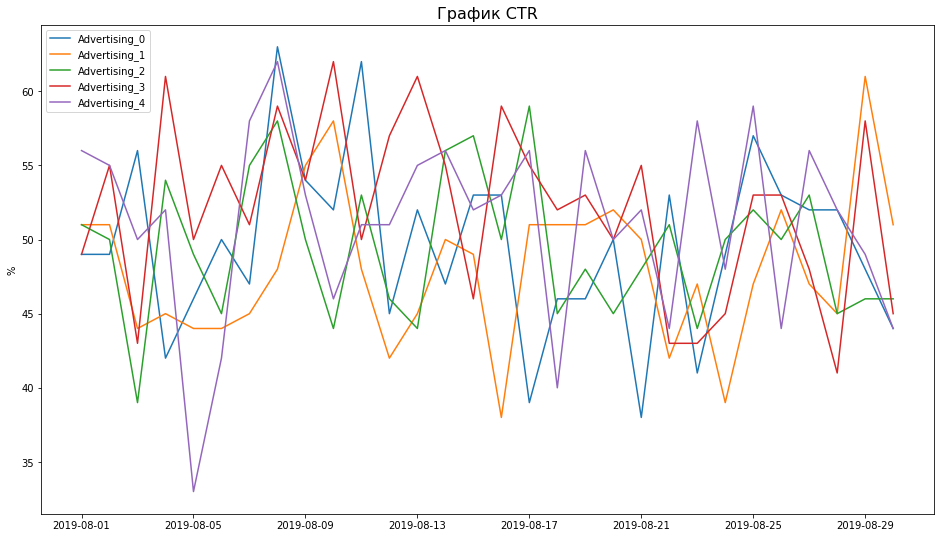

In [41]:
plt.figure(figsize=(16,9))
for i in range(1,6):
    plt.plot(a[a.adv_id==i]['date'],a[a.adv_id==i]['ctr'])
plt.legend(a.name)
plt.title('График CTR', fontsize=16)
plt.ylabel('%')

Text(0, 0.5, 'у.е.')

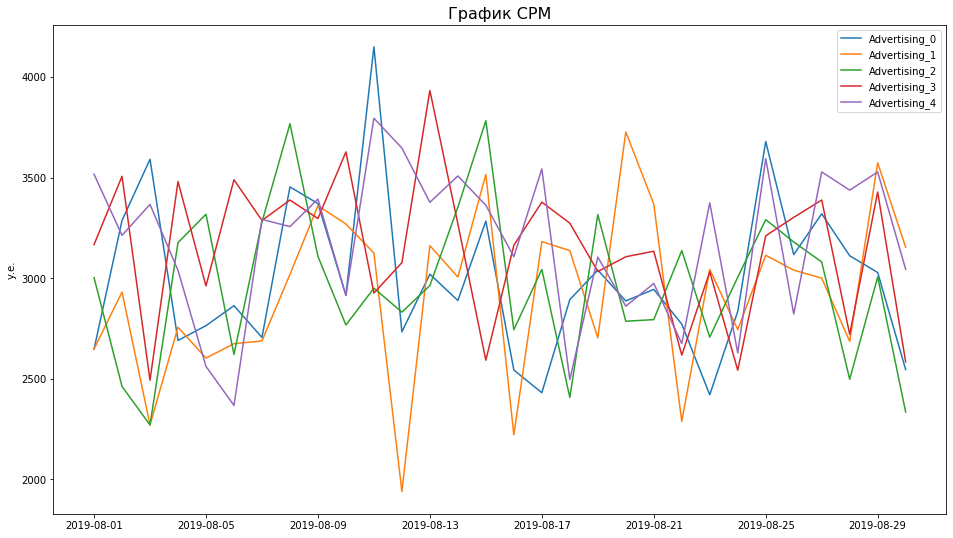

In [50]:
import seaborn as sns
plt.figure(figsize=(16,9))
for i in range(1,6):
    plt.plot(a[a.adv_id==i]['date'],a[a.adv_id==i]['cpm'])
plt.legend(a.name)
plt.title('График CPM', fontsize=16)
plt.ylabel('у.е.')